In [3]:
import pandas as pd 


df = pd.read_stata('hwdata.dta')
df

,masterid,afreq,province,uezd,serfperc1,distance_moscow,goodsoil,lnurban,lnpopn,province_capital,ch_schools_pc,nozemstvo,redist
0,1,0.076923,Arkhangel'sk,Arkhangel'skii,0.000350,1.068309,0.253614,9.912397,10.930694,1.0,0.235793,1.0,1.296864
1,2,0.000000,Arkhangel'sk,Kemskii,0.000000,1.282394,0.233523,7.696213,10.438284,0.0,0.235452,1.0,1.143626
2,3,NaN,Arkhangel'sk,Kol'skii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0.000000,Arkhangel'sk,Mezenskii,0.000000,1.320864,0.182332,7.465655,10.640317,0.0,0.217753,1.0,0.871011
4,5,0.000000,Arkhangel'sk,Onezhskii,0.000032,0.886230,0.206245,7.507690,10.382637,0.0,0.235530,1.0,1.207089
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,513,0.461538,Zemlia voiska donskogo,Rostovskii,NaN,1.004734,0.783462,9.791661,11.598011,0.0,NaN,1.0,NaN
500,514,0.000000,Zemlia voiska donskogo,Sal'skii,NaN,1.050756,0.608183,NaN,NaN,0.0,NaN,1.0,NaN
501,515,0.000000,Zemlia voiska donskogo,Taganrogskii,NaN,0.905405,0.974946,9.826390,10.486736,0.0,NaN,1.0,NaN
502,516,0.000000,Zemlia voiska donskogo,Ust'-Medveditskii,0.149596,0.784714,0.805769,0.000000,12.165553,0.0,0.205883,0.0,0.870146


Создайте переменную zemstvo посредством перекодирования nozemstvo
таким образом, чтобы единицей обозначались уезды тех губерний, в
которых в результате реформы 1864 г. земства были созданы, нулем –
наоборот, уезды тех губерний, в которых земства не были созданы.

In [4]:
df['zemstvo'] = df['nozemstvo'].apply(lambda x: 0 if x == 1.0 else 1 if x == 0.0 else None)
df['zemstvo']

0      0.0
1      0.0
2      NaN
3      0.0
4      0.0
      ... 
499    0.0
500    0.0
501    0.0
502    1.0
503    1.0
Name: zemstvo, Length: 504, dtype: float64

Визуализируйте взаимосвязь изменения в количестве сельских школ
на душу населения (ch_schools_pc – по оси ординат) и доли лет, в которые были зафиксированы крестьянские выступления (afreq – по оси
абсцисс), в разных группах, а именно сформированные по признаку
«наличие земства» и «отсутствие земства». Сделайте предварительный вывод на основе указанного графика.

<Axes: >

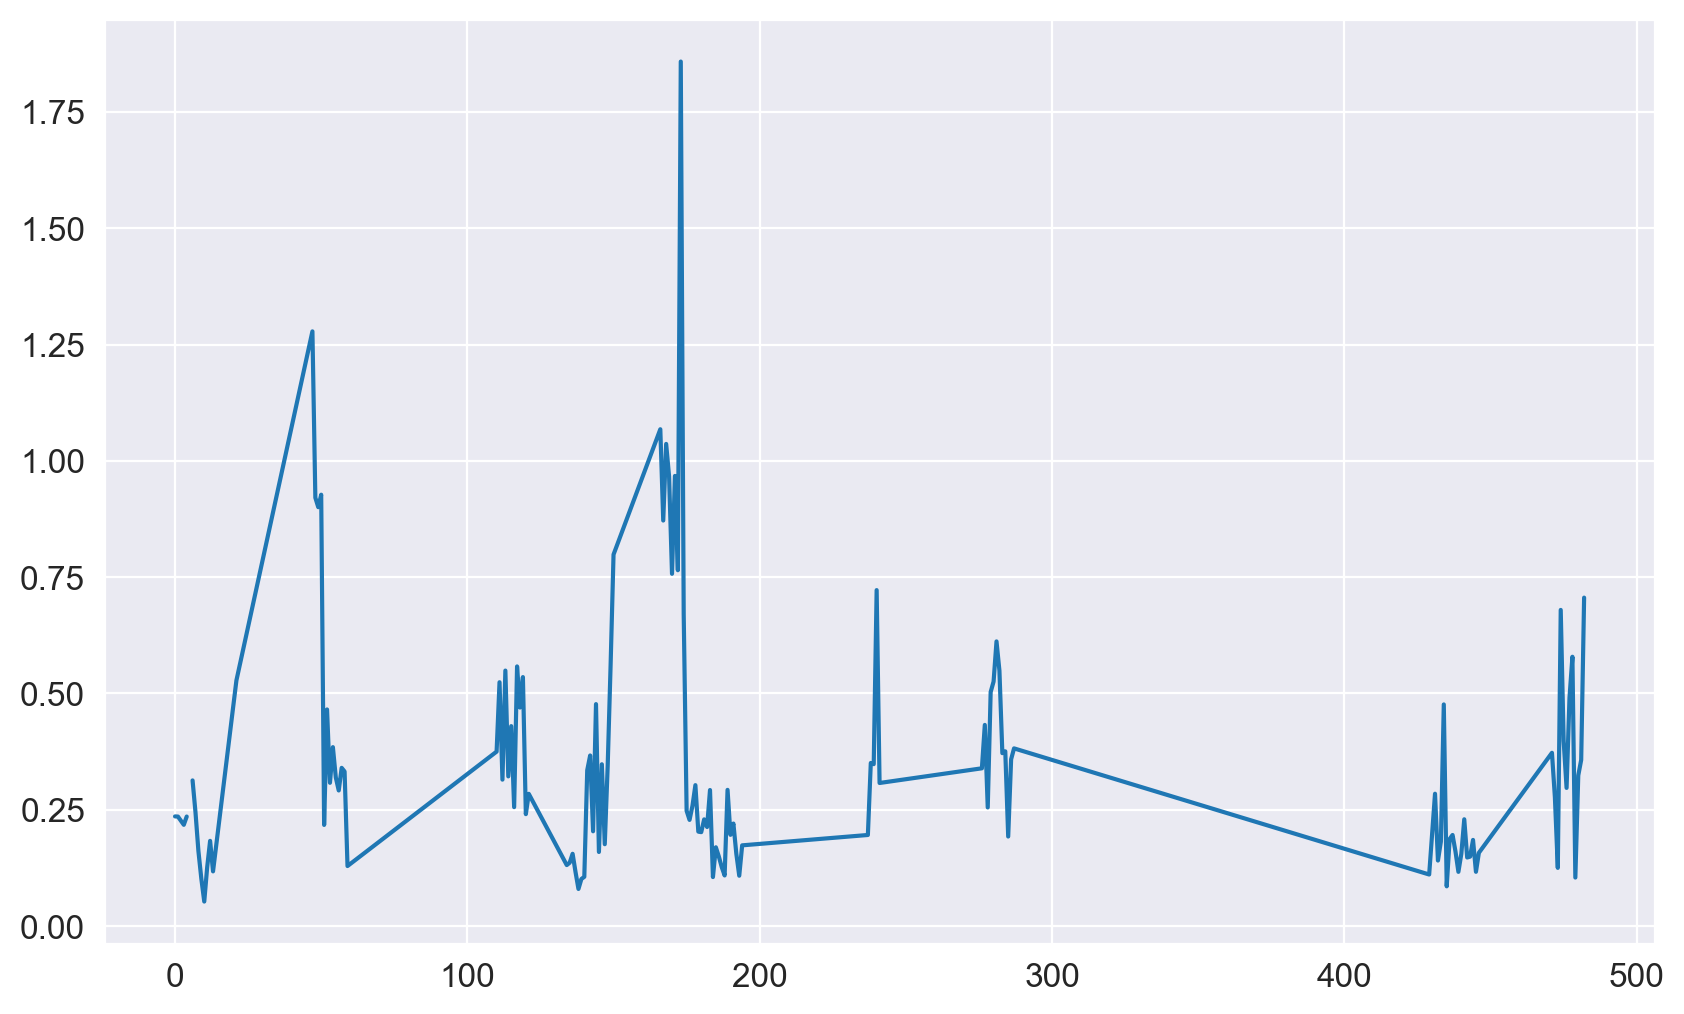

In [17]:
# Делаем красоту
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
sns.set_style('darkgrid')

# Выбираем значения для не земств
X_1, Y_1 = df[df['zemstvo'] == 0.0]['afreq'], df[df['zemstvo'] == 0.0]['ch_schools_pc']

# Выбираем значения для земств
X_2, Y_2 = df[df['zemstvo'] == 1.0]['afreq'], df[df['zemstvo'] == 1.0]['ch_schools_pc']

plt.figure(figsize=(10, 6))



Вывод по графикам

In [12]:
df.describe()

,masterid,afreq,serfperc1,distance_moscow,goodsoil,lnurban,lnpopn,province_capital,ch_schools_pc,nozemstvo,redist,zemstvo
count,504.000000,500.000000,496.000000,500.000000,500.000000,491.000000,491.000000,500.0000,496.000000,500.000000,496.000000,500.000000
mean,260.359127,0.278154,0.384654,0.640294,0.450958,8.730187,11.619652,0.1000,0.274334,0.270000,1.264495,0.730000
std,148.713582,0.169759,0.250105,0.321344,0.389598,1.302431,0.477882,0.3003,0.192868,0.444404,1.112368,0.444404
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.488956,0.0000,0.049276,0.000000,0.197106,0.000000
25%,132.750000,0.153846,0.142125,0.392369,0.063637,8.158945,11.367603,0.0000,0.160365,0.000000,0.725592,0.000000
50%,260.500000,0.307692,0.429770,0.629033,0.314497,8.759982,11.648208,0.0000,0.218392,0.000000,0.945298,1.000000
75%,387.250000,0.384615,0.593919,0.869572,0.864854,9.358948,11.897823,0.0000,0.315745,1.000000,1.398123,1.000000
max,517.000000,0.846154,0.852121,1.697391,1.000000,13.198354,13.305210,1.0000,1.858114,1.000000,13.619979,1.000000
